In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean  # Optional for better ocean colormaps

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import shapely.geometry as sgeom
import cartopy
import cmocean
from matplotlib.patches import Circle
from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
import numpy as np
import matplotlib.path as mpath

In [35]:
path = '../data/copernicus/cmems_mod_arc_phy_my_topaz4_P1M/cmems_mod_arc_phy_my_topaz4_P1M_multi-vars_180.00W-179.88E_50.00N-90.00N_0.00-4000.00m_2015-01-01-2016-12-01.nc'

In [36]:
ds = xr.open_dataset(path, engine='netcdf4')

In [37]:
# print unique time values for the ds xr dataset
print(np.unique(ds.time.values))
unique_times = np.unique(ds.time.values)

['2015-01-01T00:00:00.000000000' '2015-02-01T00:00:00.000000000'
 '2015-03-01T00:00:00.000000000' '2015-04-01T00:00:00.000000000'
 '2015-05-01T00:00:00.000000000' '2015-06-01T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2015-08-01T00:00:00.000000000'
 '2015-09-01T00:00:00.000000000' '2015-10-01T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2016-02-01T00:00:00.000000000'
 '2016-03-01T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-05-01T00:00:00.000000000' '2016-06-01T00:00:00.000000000'
 '2016-07-01T00:00:00.000000000' '2016-08-01T00:00:00.000000000'
 '2016-09-01T00:00:00.000000000' '2016-10-01T00:00:00.000000000'
 '2016-11-01T00:00:00.000000000' '2016-12-01T00:00:00.000000000']


In [46]:
variables = list(ds.data_vars)

In [65]:
variables

['mlotst', 'siconc', 'sisnthick', 'so', 'thetao', 'vxsi', 'vysi']

In [66]:
# Create a circular boundary path
def make_circular_boundary():
    theta = np.linspace(0, 2 * np.pi, 100)
    center = [0.5, 0.5]
    radius = 0.4
    verts = np.vstack([np.cos(theta), np.sin(theta)]).T * radius + center
    return mpath.Path(verts)

# Get list of data variables
variables = list(ds.data_vars)

toplot = 'std' # 'mean' or 'std'
# existing code...
# Loop through each variable
for var in variables:
    print('plotting: ', var)
    # Get data for the current variable
    if 'depth' in ds[var].dims:
        if toplot == 'mean':
            data = ds.isel(depth=0)[var].mean(dim='time')
        elif toplot == 'std':
            data = ds.isel(depth=0)[var].std(dim='time')
    else:
        if toplot == 'mean':
            data = ds[var].mean(dim='time')
        elif toplot == 'std':
            data = ds[var].std(dim='time')

    # Standardize the data
    data_mean = data.mean()
    data_std = data.std()
    standardized_data = (data - data_mean) / data_std

    # Create a figure with polar stereographic projection
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))

    # Set circular boundary
    ax.set_boundary(make_circular_boundary(), transform=ax.transAxes)

    # Set the extent to focus on the Arctic region
    ax.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())

    # Add coastlines and gridlines
    ax.coastlines()
    gl = ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k', facecolor='lightgray')

    # Plot the standardized data for the current variable
    im = standardized_data.plot(ax=ax, transform=ccrs.PlateCarree(), 
                                cmap=cmocean.cm.deep,
                                add_colorbar=False)

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.08)
    cbar.set_label(f'{var} (Standardized)', fontsize=12)

    # Add title
    try:
        time_str = str(ds.time.values[0])
        if len(time_str) > 10:
            time_str = time_str[:10]
        plt.title(f'Variable {var} ({toplot}) - 2015-01-01 to 2016-12-01', fontsize=14)
    except:
        plt.title(f'Arctic {var} ({toplot})', fontsize=14)

    plt.tight_layout()
    
    # Save the plot
    if toplot == 'mean':
        save_path = '../Exercise_Week7/plots/mean_standardized/'
    elif toplot == 'std':
        save_path = '../Exercise_Week7/plots/std_standardized/'
    plt.savefig(f'{save_path}{var}_{toplot}.png', bbox_inches='tight', dpi=300)
    plt.close()

plotting:  mlotst


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


plotting:  siconc


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


plotting:  sisnthick


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


plotting:  so


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


plotting:  thetao


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


plotting:  vxsi


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


plotting:  vysi


/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


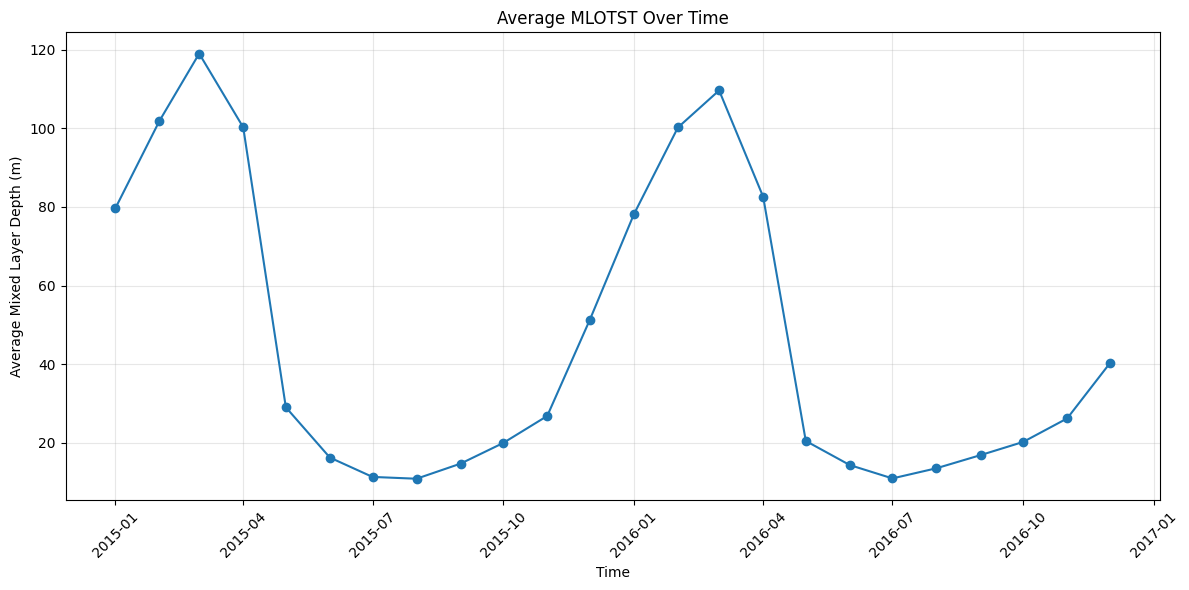

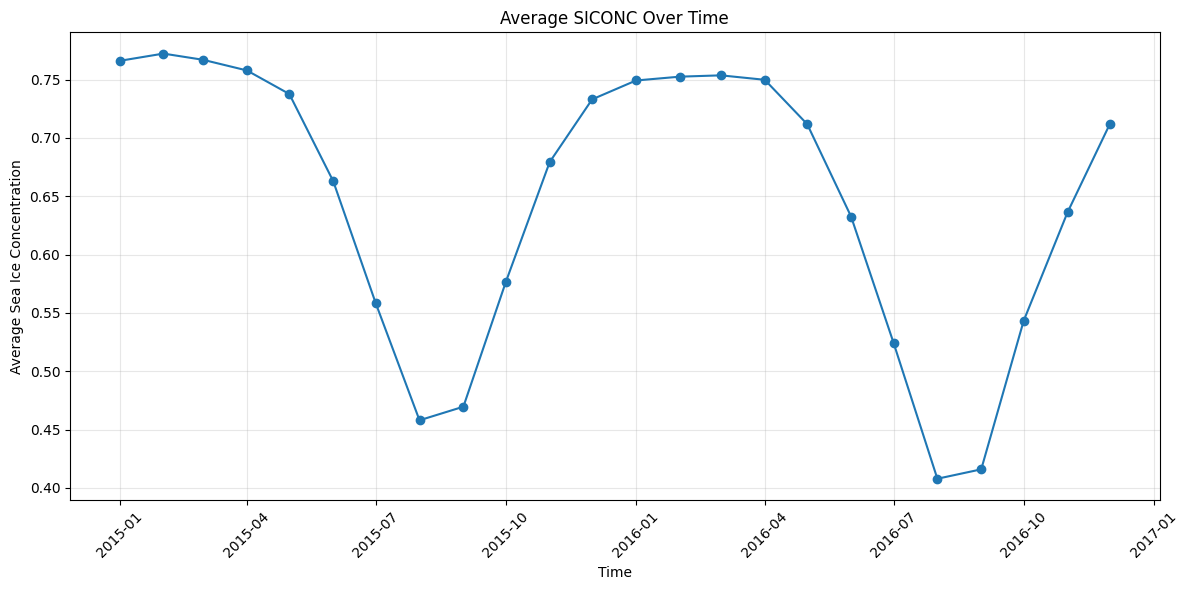

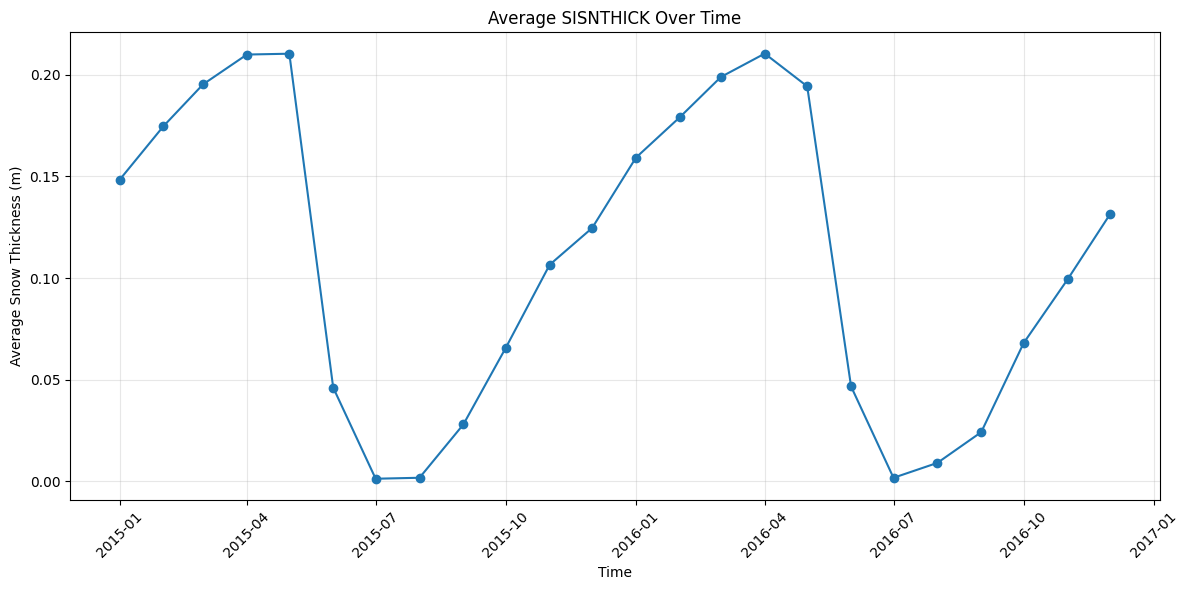

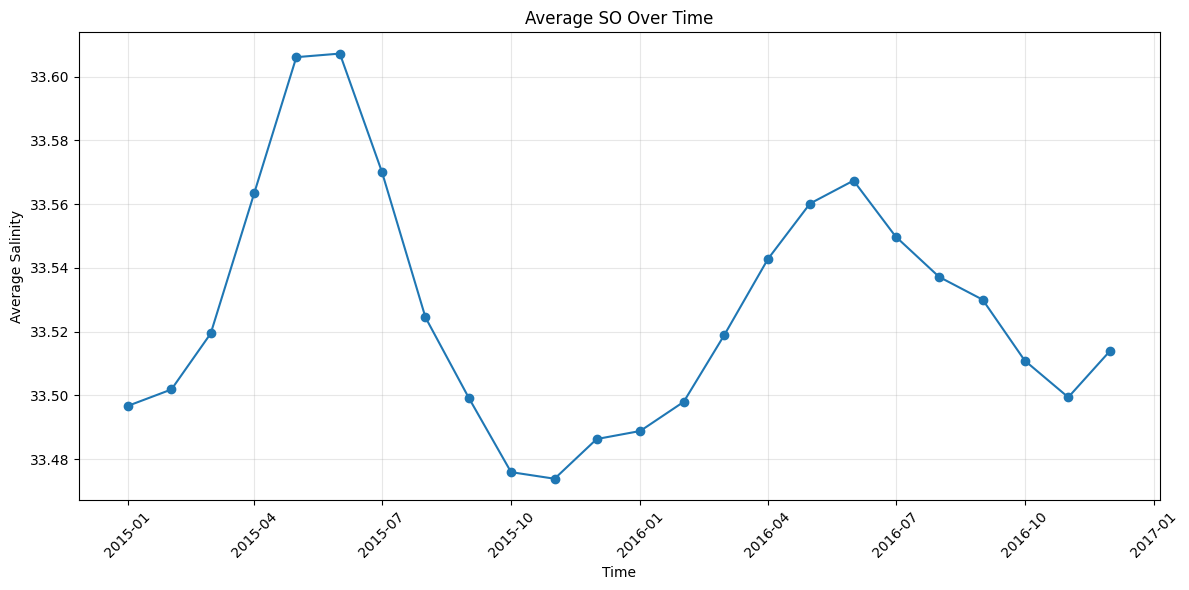

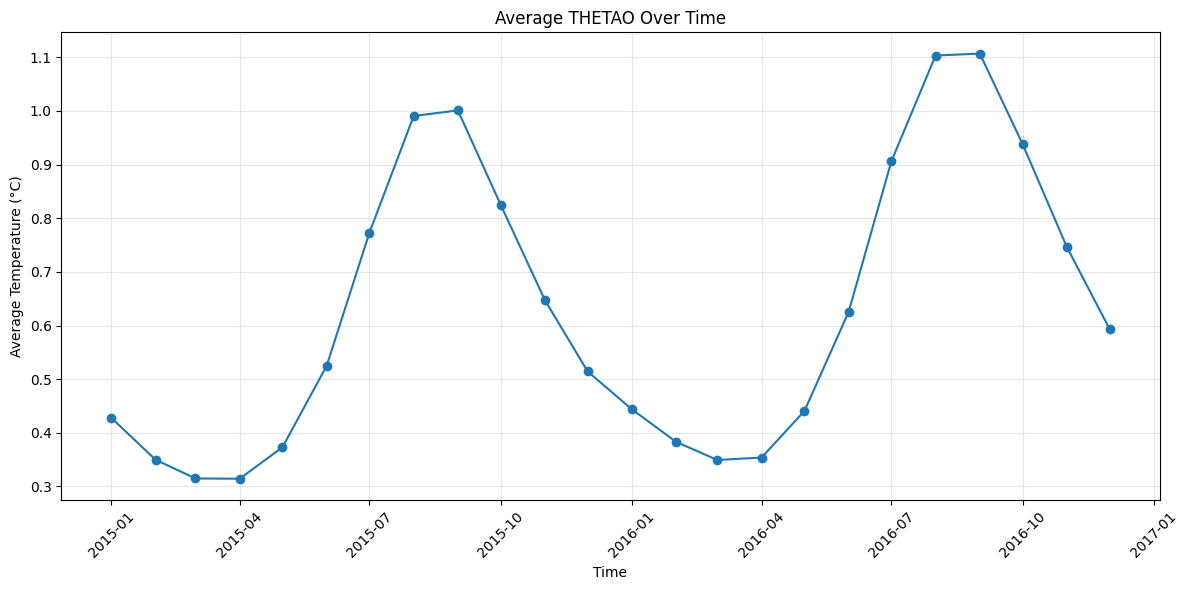

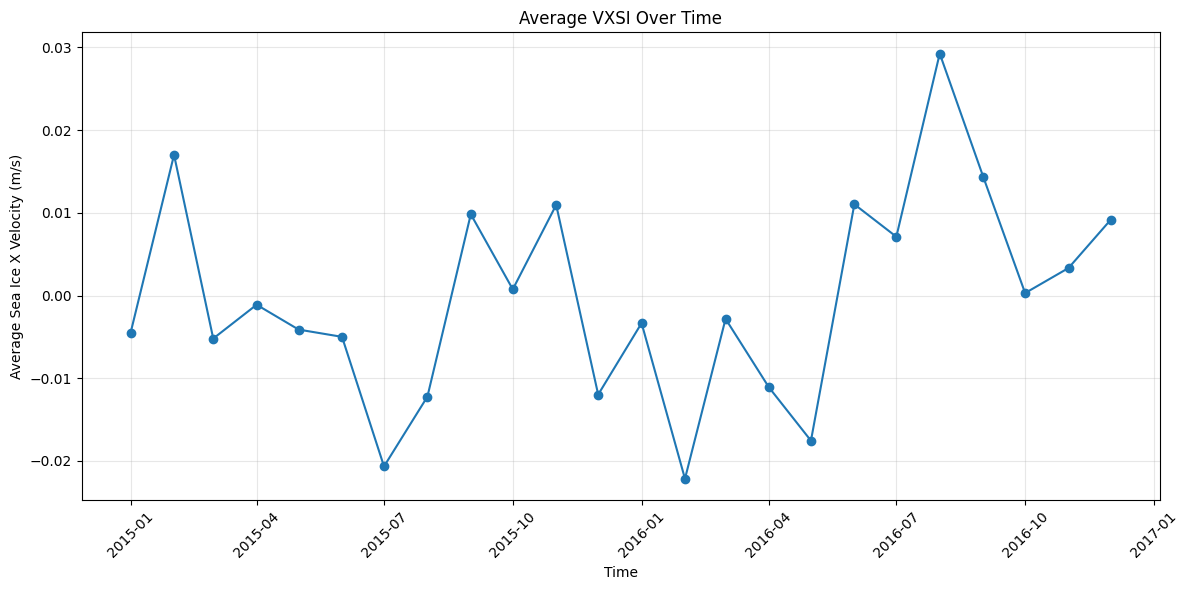

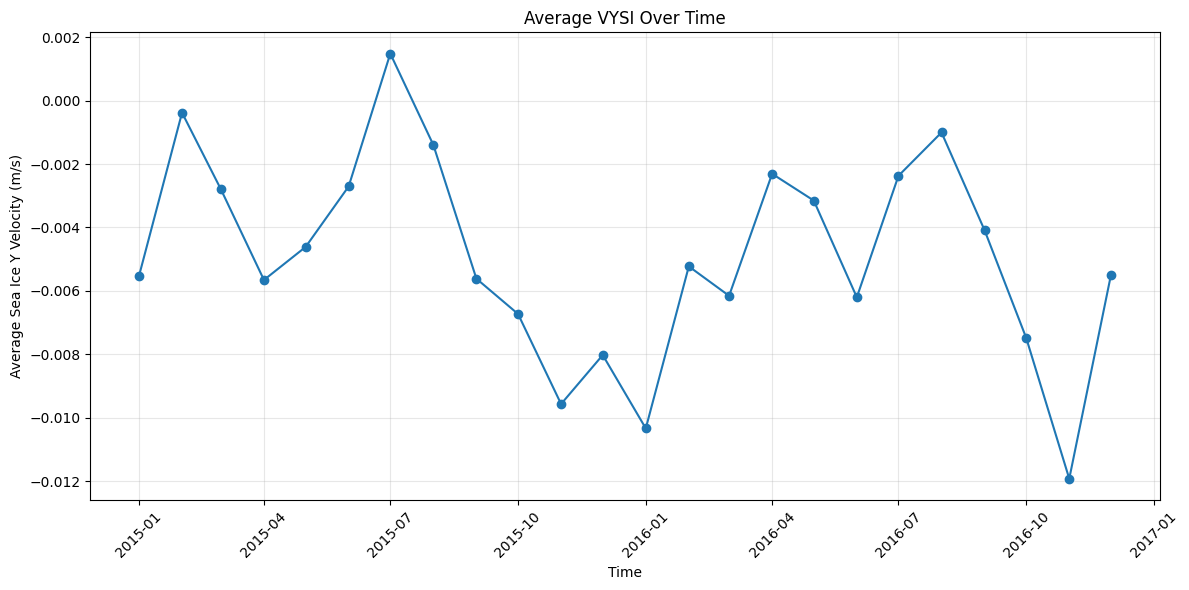

In [68]:
variables = ['mlotst', 'siconc', 'sisnthick', 'so', 'thetao', 'vxsi', 'vysi']

unique_times = np.unique(ds.time.values)

for var in variables:
    # Create a time series plot for each variable
    plt.figure(figsize=(12, 6))
    
    # Calculate mean values for each time
    mean_values = []
    for time in unique_times:
        data = ds.sel(time=time)[var].values.flatten()
        mean_values.append(np.nanmean(data))

    plt.plot(unique_times, mean_values, marker='o')

    plt.xlabel('Time')
    
    # Set appropriate y-label based on variable
    labels = {
        'mlotst': 'Average Mixed Layer Depth (m)',
        'siconc': 'Average Sea Ice Concentration',
        'sisnthick': 'Average Snow Thickness (m)',
        'so': 'Average Salinity',
        'thetao': 'Average Temperature (°C)',
        'vxsi': 'Average Sea Ice X Velocity (m/s)',
        'vysi': 'Average Sea Ice Y Velocity (m/s)'
    }
    plt.ylabel(labels[var])
    
    plt.title(f'Average {var.upper()} Over Time')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

    save_path = '../Exercise_Week7/plots/mean_overtime/'
    plt.savefig(f'{save_path}{var}_mean_overtime.png', bbox_inches='tight', dpi=300)

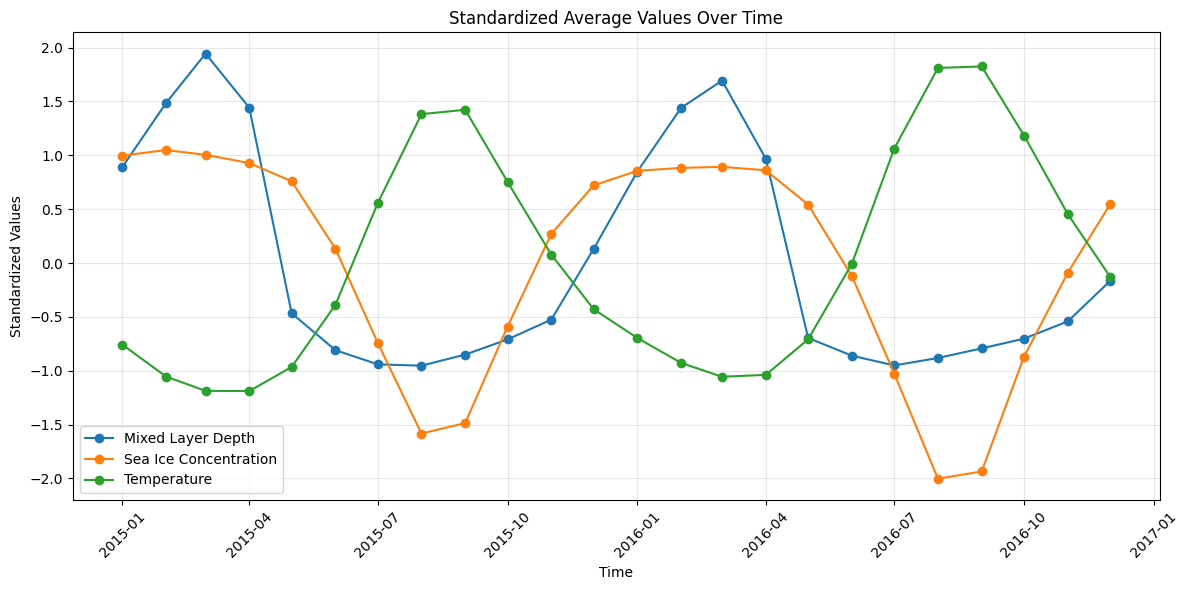

In [75]:
variables = ['mlotst', 'siconc', 'sisnthick', 'so', 'thetao', 'vxsi', 'vysi']
variables = ['mlotst', 'siconc', 'thetao']

unique_times = np.unique(ds.time.values)

# Create single plot
plt.figure(figsize=(12, 6))

# Dictionary to store labels for legend
labels = {
    'mlotst': 'Mixed Layer Depth',
    'siconc': 'Sea Ice Concentration', 
    'sisnthick': 'Snow Thickness',
    'so': 'Salinity',
    'thetao': 'Temperature',
    'vxsi': 'Sea Ice X Velocity',
    'vysi': 'Sea Ice Y Velocity'
}

for var in variables:
    # Calculate mean values for each time
    mean_values = []
    for time in unique_times:
        data = ds.sel(time=time)[var].values.flatten()
        mean_values.append(np.nanmean(data))
    
    # Standard scale the values
    mean_values = np.array(mean_values)
    scaled_values = (mean_values - np.nanmean(mean_values)) / np.nanstd(mean_values)
    
    plt.plot(unique_times, scaled_values, marker='o', label=labels[var])

plt.xlabel('Time')
plt.ylabel('Standardized Values')
plt.title('Standardized Average Values Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

save_path = '../Exercise_Week7/plots/mean_overtime/'
plt.savefig(f'{save_path}_mlotst_siconc_thetao.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()